raw_pga_536_2021

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import re

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [166]:
masters2021 = pd.read_csv("raw_pga_536_2021.csv")
masters2021.head()

,tour,year,season,event_name,event_id,player_name,dg_id,fin_text,round_num,course_name,...,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots
0,pga,2021,2021,The Masters,536,"Matsuyama, Hideki",13562,1,1,Augusta National Golf Club,...,3.207,5.523,283.8,0.714,0.722,1.000,44.273,38.172,7.0,3.0
1,pga,2021,2021,The Masters,536,"Matsuyama, Hideki",13562,1,2,Augusta National Golf Club,...,3.062,1.330,301.9,0.786,0.778,0.429,38.792,38.045,3.0,3.0
2,pga,2021,2021,The Masters,536,"Matsuyama, Hideki",13562,1,3,Augusta National Golf Club,...,5.630,7.426,298.5,0.357,0.667,0.714,50.730,10.420,7.0,3.0
3,pga,2021,2021,The Masters,536,"Matsuyama, Hideki",13562,1,4,Augusta National Golf Club,...,1.103,-0.370,304.3,0.714,0.611,0.636,166.794,36.691,4.0,5.0
4,pga,2021,2021,The Masters,536,"Zalatoris, Will",19428,2,1,Augusta National Golf Club,...,2.985,4.523,302.0,0.643,0.778,0.571,35.775,38.183,6.0,2.0


In [167]:
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tour          284 non-null    object 
 1   year          284 non-null    int64  
 2   season        284 non-null    int64  
 3   event_name    284 non-null    object 
 4   event_id      284 non-null    int64  
 5   player_name   284 non-null    object 
 6   dg_id         284 non-null    int64  
 7   fin_text      284 non-null    object 
 8   round_num     284 non-null    int64  
 9   course_name   284 non-null    object 
 10  course_num    284 non-null    int64  
 11  course_par    284 non-null    int64  
 12  start_hole    284 non-null    int64  
 13  teetime       284 non-null    object 
 14  round_score   284 non-null    int64  
 15  sg_putt       282 non-null    float64
 16  sg_arg        282 non-null    float64
 17  sg_app        282 non-null    float64
 18  sg_ott        282 non-null    

In [168]:
# begin data cleaning
# start by dropping 'tour' column since all of the tournaments in my scope are in the same tour (PGA)

masters2021.drop(columns = 'tour', inplace = True)

In [169]:
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          284 non-null    int64  
 1   season        284 non-null    int64  
 2   event_name    284 non-null    object 
 3   event_id      284 non-null    int64  
 4   player_name   284 non-null    object 
 5   dg_id         284 non-null    int64  
 6   fin_text      284 non-null    object 
 7   round_num     284 non-null    int64  
 8   course_name   284 non-null    object 
 9   course_num    284 non-null    int64  
 10  course_par    284 non-null    int64  
 11  start_hole    284 non-null    int64  
 12  teetime       284 non-null    object 
 13  round_score   284 non-null    int64  
 14  sg_putt       282 non-null    float64
 15  sg_arg        282 non-null    float64
 16  sg_app        282 non-null    float64
 17  sg_ott        282 non-null    float64
 18  sg_t2g        282 non-null    

In [170]:
# drop event_name since events are stored numerically under event_id
masters2021.drop(columns = 'event_name', inplace = True)

In [171]:
# sanity check
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          284 non-null    int64  
 1   season        284 non-null    int64  
 2   event_id      284 non-null    int64  
 3   player_name   284 non-null    object 
 4   dg_id         284 non-null    int64  
 5   fin_text      284 non-null    object 
 6   round_num     284 non-null    int64  
 7   course_name   284 non-null    object 
 8   course_num    284 non-null    int64  
 9   course_par    284 non-null    int64  
 10  start_hole    284 non-null    int64  
 11  teetime       284 non-null    object 
 12  round_score   284 non-null    int64  
 13  sg_putt       282 non-null    float64
 14  sg_arg        282 non-null    float64
 15  sg_app        282 non-null    float64
 16  sg_ott        282 non-null    float64
 17  sg_t2g        282 non-null    float64
 18  sg_total      284 non-null    

In [172]:
# drop player_name since names are stored/mapped numerically under dg_id
masters2021.drop(columns = 'player_name', inplace = True)

In [173]:
# sanity check
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          284 non-null    int64  
 1   season        284 non-null    int64  
 2   event_id      284 non-null    int64  
 3   dg_id         284 non-null    int64  
 4   fin_text      284 non-null    object 
 5   round_num     284 non-null    int64  
 6   course_name   284 non-null    object 
 7   course_num    284 non-null    int64  
 8   course_par    284 non-null    int64  
 9   start_hole    284 non-null    int64  
 10  teetime       284 non-null    object 
 11  round_score   284 non-null    int64  
 12  sg_putt       282 non-null    float64
 13  sg_arg        282 non-null    float64
 14  sg_app        282 non-null    float64
 15  sg_ott        282 non-null    float64
 16  sg_t2g        282 non-null    float64
 17  sg_total      284 non-null    float64
 18  driving_dist  282 non-null    

In [174]:
# drop course_name since names are stored/mapped numerically under course_num
masters2021.drop(columns = 'course_name', inplace = True)

In [175]:
# sanity check
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          284 non-null    int64  
 1   season        284 non-null    int64  
 2   event_id      284 non-null    int64  
 3   dg_id         284 non-null    int64  
 4   fin_text      284 non-null    object 
 5   round_num     284 non-null    int64  
 6   course_num    284 non-null    int64  
 7   course_par    284 non-null    int64  
 8   start_hole    284 non-null    int64  
 9   teetime       284 non-null    object 
 10  round_score   284 non-null    int64  
 11  sg_putt       282 non-null    float64
 12  sg_arg        282 non-null    float64
 13  sg_app        282 non-null    float64
 14  sg_ott        282 non-null    float64
 15  sg_t2g        282 non-null    float64
 16  sg_total      284 non-null    float64
 17  driving_dist  282 non-null    float64
 18  driving_acc   282 non-null    

In [176]:
# exploring fin_text - the placement of players
masters2021['fin_text'].value_counts()

fin_text
CUT    66
T26    32
T12    24
T40    24
T21    20
T34    16
T46    12
T18    12
T10     8
T8      8
T38     8
T5      8
T3      8
T50     8
52      4
54      4
53      4
1       4
49      4
2       4
7       4
DQ      2
Name: count, dtype: int64

In [177]:
# remapping. 
# THIS MAPPING WILL BE ADJUSTED TO HAVE A STRING INDEXER ONCE UPDATED DATA IS RECEIVED
masters2021['fin_text'] = masters2021['fin_text'].map({
    'CUT': 0,
    'T26': 26,
    'T12': 12,
    'T40': 40,
    'T21': 21,
    'T34': 34,
    'T46': 46,
    'T18': 18,
    'T10': 10,
    'T8' :  8,
    'T38': 38,
    'T5' :  5,
    'T3' :  3,
    'T50':  50,
    'DQ' :  0,
    '52' :  52,
    '54' :  54,
    '53' :  53,
    '1'  :   1,
    '49' :  49,
    '2'  :   2,
    '7'  :   7
})

In [178]:
# to check if fin_text dtype was changed
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          284 non-null    int64  
 1   season        284 non-null    int64  
 2   event_id      284 non-null    int64  
 3   dg_id         284 non-null    int64  
 4   fin_text      284 non-null    int64  
 5   round_num     284 non-null    int64  
 6   course_num    284 non-null    int64  
 7   course_par    284 non-null    int64  
 8   start_hole    284 non-null    int64  
 9   teetime       284 non-null    object 
 10  round_score   284 non-null    int64  
 11  sg_putt       282 non-null    float64
 12  sg_arg        282 non-null    float64
 13  sg_app        282 non-null    float64
 14  sg_ott        282 non-null    float64
 15  sg_t2g        282 non-null    float64
 16  sg_total      284 non-null    float64
 17  driving_dist  282 non-null    float64
 18  driving_acc   282 non-null    

In [179]:
masters2021['fin_text'].value_counts()

fin_text
0     68
26    32
40    24
12    24
21    20
34    16
46    12
18    12
5      8
50     8
38     8
3      8
10     8
8      8
2      4
49     4
7      4
52     4
53     4
54     4
1      4
Name: count, dtype: int64

In [180]:
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          284 non-null    int64  
 1   season        284 non-null    int64  
 2   event_id      284 non-null    int64  
 3   dg_id         284 non-null    int64  
 4   fin_text      284 non-null    int64  
 5   round_num     284 non-null    int64  
 6   course_num    284 non-null    int64  
 7   course_par    284 non-null    int64  
 8   start_hole    284 non-null    int64  
 9   teetime       284 non-null    object 
 10  round_score   284 non-null    int64  
 11  sg_putt       282 non-null    float64
 12  sg_arg        282 non-null    float64
 13  sg_app        282 non-null    float64
 14  sg_ott        282 non-null    float64
 15  sg_t2g        282 non-null    float64
 16  sg_total      284 non-null    float64
 17  driving_dist  282 non-null    float64
 18  driving_acc   282 non-null    

In [183]:
masters2021.head()

,year,season,event_id,dg_id,fin_text,round_num,course_num,course_par,start_hole,teetime,...,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots
0,2021,2021,536,13562,1,1,14,72,1,9:48am,...,3.207,5.523,283.8,0.714,0.722,1.000,44.273,38.172,7.0,3.0
1,2021,2021,536,13562,1,2,14,72,1,1:00pm,...,3.062,1.330,301.9,0.786,0.778,0.429,38.792,38.045,3.0,3.0
2,2021,2021,536,13562,1,3,14,72,1,1:30pm,...,5.630,7.426,298.5,0.357,0.667,0.714,50.730,10.420,7.0,3.0
3,2021,2021,536,13562,1,4,14,72,1,2:40pm,...,1.103,-0.370,304.3,0.714,0.611,0.636,166.794,36.691,4.0,5.0
4,2021,2021,536,19428,2,1,14,72,1,8:48am,...,2.985,4.523,302.0,0.643,0.778,0.571,35.775,38.183,6.0,2.0


In [188]:
def normalize_time_format(time_str):
    return re.sub(r'(\d+:\d+)([ap]m)', r'\1 \2', time_str)

In [189]:
def time_to_minutes(time_str):
    time_str = normalize_time_format(time_str)
    time_obj = pd.to_datetime(time_str, format='%I:%M %p')
    return time_obj.hour * 60 + time_obj.minute

In [190]:
masters2021['teetime_int'] = masters2021['teetime'].apply(time_to_minutes)

In [191]:
masters2021.head()

,year,season,event_id,dg_id,fin_text,round_num,course_num,course_par,start_hole,teetime,...,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,teetime_int
0,2021,2021,536,13562,1,1,14,72,1,9:48am,...,5.523,283.8,0.714,0.722,1.000,44.273,38.172,7.0,3.0,588
1,2021,2021,536,13562,1,2,14,72,1,1:00pm,...,1.330,301.9,0.786,0.778,0.429,38.792,38.045,3.0,3.0,780
2,2021,2021,536,13562,1,3,14,72,1,1:30pm,...,7.426,298.5,0.357,0.667,0.714,50.730,10.420,7.0,3.0,810
3,2021,2021,536,13562,1,4,14,72,1,2:40pm,...,-0.370,304.3,0.714,0.611,0.636,166.794,36.691,4.0,5.0,880
4,2021,2021,536,19428,2,1,14,72,1,8:48am,...,4.523,302.0,0.643,0.778,0.571,35.775,38.183,6.0,2.0,528


In [192]:
# Define bins and labels
bins = [0, 600, 720, float('inf')]
labels = [1, 2, 3] # 1 for 480-600 or 8AM-10AM, 2 for 601-720 or 10AM-12PM, 3 for anything greater than 721 or anytime after 12PM

# Create the tee_time_of_day column using pd.cut
masters2021['tee_time_of_day'] = pd.cut(masters2021['teetime_int'], bins=bins, labels=labels, right=False)

masters2021['tee_time_of_day_int'] = masters2021['tee_time_of_day'].cat.codes + 1  # Adding 1 to match the labels

In [193]:
# sanity check
masters2021.head()

,year,season,event_id,dg_id,fin_text,round_num,course_num,course_par,start_hole,teetime,...,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,teetime_int,tee_time_of_day,tee_time_of_day_int
0,2021,2021,536,13562,1,1,14,72,1,9:48am,...,0.714,0.722,1.000,44.273,38.172,7.0,3.0,588,1,1
1,2021,2021,536,13562,1,2,14,72,1,1:00pm,...,0.786,0.778,0.429,38.792,38.045,3.0,3.0,780,3,3
2,2021,2021,536,13562,1,3,14,72,1,1:30pm,...,0.357,0.667,0.714,50.730,10.420,7.0,3.0,810,3,3
3,2021,2021,536,13562,1,4,14,72,1,2:40pm,...,0.714,0.611,0.636,166.794,36.691,4.0,5.0,880,3,3
4,2021,2021,536,19428,2,1,14,72,1,8:48am,...,0.643,0.778,0.571,35.775,38.183,6.0,2.0,528,1,1


In [194]:
# sanity check to ensure mapping went through
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   year                 284 non-null    int64   
 1   season               284 non-null    int64   
 2   event_id             284 non-null    int64   
 3   dg_id                284 non-null    int64   
 4   fin_text             284 non-null    int64   
 5   round_num            284 non-null    int64   
 6   course_num           284 non-null    int64   
 7   course_par           284 non-null    int64   
 8   start_hole           284 non-null    int64   
 9   teetime              284 non-null    object  
 10  round_score          284 non-null    int64   
 11  sg_putt              282 non-null    float64 
 12  sg_arg               282 non-null    float64 
 13  sg_app               282 non-null    float64 
 14  sg_ott               282 non-null    float64 
 15  sg_t2g               28

In [ ]:
# drop teetime since it was mapped in teetime_int and grouped in tee_time_of_day
masters2021.drop(columns = 'teetime', inplace = True)


In [198]:
# drop tee_time_of_day since it was converted to int in another column
masters2021.drop(columns = 'tee_time_of_day', inplace = True)

In [199]:
# sanity check
masters2021.head()

,year,season,event_id,dg_id,fin_text,round_num,course_num,course_par,start_hole,round_score,...,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,teetime_int,tee_time_of_day_int
0,2021,2021,536,13562,1,1,14,72,1,69,...,283.8,0.714,0.722,1.000,44.273,38.172,7.0,3.0,588,1
1,2021,2021,536,13562,1,2,14,72,1,71,...,301.9,0.786,0.778,0.429,38.792,38.045,3.0,3.0,780,3
2,2021,2021,536,13562,1,3,14,72,1,65,...,298.5,0.357,0.667,0.714,50.730,10.420,7.0,3.0,810,3
3,2021,2021,536,13562,1,4,14,72,1,73,...,304.3,0.714,0.611,0.636,166.794,36.691,4.0,5.0,880,3
4,2021,2021,536,19428,2,1,14,72,1,70,...,302.0,0.643,0.778,0.571,35.775,38.183,6.0,2.0,528,1


In [200]:
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 284 non-null    int64  
 1   season               284 non-null    int64  
 2   event_id             284 non-null    int64  
 3   dg_id                284 non-null    int64  
 4   fin_text             284 non-null    int64  
 5   round_num            284 non-null    int64  
 6   course_num           284 non-null    int64  
 7   course_par           284 non-null    int64  
 8   start_hole           284 non-null    int64  
 9   round_score          284 non-null    int64  
 10  sg_putt              282 non-null    float64
 11  sg_arg               282 non-null    float64
 12  sg_app               282 non-null    float64
 13  sg_ott               282 non-null    float64
 14  sg_t2g               282 non-null    float64
 15  sg_total             284 non-null    flo

In [201]:
# create a made cut column to see who made the cut. note this will populate 4x for people that made it
masters2021['made_cut'] = masters2021['fin_text'].apply(lambda x: 0 if x == 0 else 1)


In [202]:
masters2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 284 non-null    int64  
 1   season               284 non-null    int64  
 2   event_id             284 non-null    int64  
 3   dg_id                284 non-null    int64  
 4   fin_text             284 non-null    int64  
 5   round_num            284 non-null    int64  
 6   course_num           284 non-null    int64  
 7   course_par           284 non-null    int64  
 8   start_hole           284 non-null    int64  
 9   round_score          284 non-null    int64  
 10  sg_putt              282 non-null    float64
 11  sg_arg               282 non-null    float64
 12  sg_app               282 non-null    float64
 13  sg_ott               282 non-null    float64
 14  sg_t2g               282 non-null    float64
 15  sg_total             284 non-null    flo

In [203]:
masters2021.head()

,year,season,event_id,dg_id,fin_text,round_num,course_num,course_par,start_hole,round_score,...,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,teetime_int,tee_time_of_day_int,made_cut
0,2021,2021,536,13562,1,1,14,72,1,69,...,0.714,0.722,1.000,44.273,38.172,7.0,3.0,588,1,1
1,2021,2021,536,13562,1,2,14,72,1,71,...,0.786,0.778,0.429,38.792,38.045,3.0,3.0,780,3,1
2,2021,2021,536,13562,1,3,14,72,1,65,...,0.357,0.667,0.714,50.730,10.420,7.0,3.0,810,3,1
3,2021,2021,536,13562,1,4,14,72,1,73,...,0.714,0.611,0.636,166.794,36.691,4.0,5.0,880,3,1
4,2021,2021,536,19428,2,1,14,72,1,70,...,0.643,0.778,0.571,35.775,38.183,6.0,2.0,528,1,1


In [210]:
display(masters2021['round_score'].describe())

count    284.000000
mean      73.084507
std        3.166728
min       65.000000
25%       71.000000
50%       73.000000
75%       75.000000
max       84.000000
Name: round_score, dtype: float64

In [206]:
round_score_avg = masters2021['round_score'].mean()
round_score_avg

73.08450704225352

In [207]:
round_score_std = masters2021['round_score'].std()
round_score_std

3.166728440217839

In [209]:
print(masters2021['round_score'].min())
print(masters2021['round_score'].max())

65
84


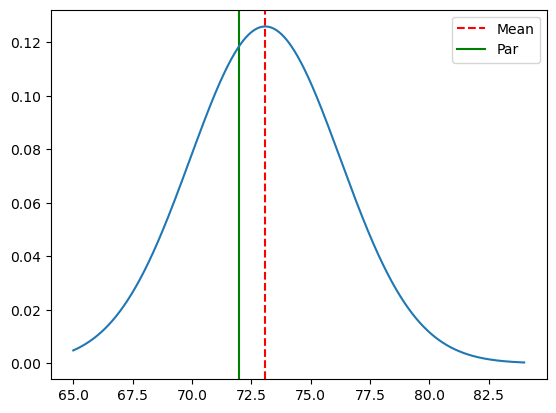

In [214]:
# distribution for round score
xvals_score = np.arange(65,84,0.01)

plt.figure()
plt.axvline(round_score_avg, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(72, color = 'green', label = 'Par')
plt.plot(xvals_score, norm.pdf(xvals_score, round_score_avg, round_score_std))
plt.legend()
plt.show()

In [215]:
corr_coef = masters2021.corr()
corr_coef

,year,season,event_id,dg_id,fin_text,round_num,course_num,course_par,start_hole,round_score,...,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,teetime_int,tee_time_of_day_int,made_cut
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dg_id,NaN,NaN,NaN,1.000000,-0.042390,0.033503,NaN,NaN,NaN,-0.106724,...,0.019143,0.207743,-0.075900,0.037157,-0.028545,0.154257,0.056878,0.133038,0.108119,0.085739
fin_text,NaN,NaN,NaN,-0.042390,1.000000,0.247550,NaN,NaN,NaN,-0.093374,...,0.078435,0.047676,0.050080,0.023320,0.030918,-0.055072,-0.112326,-0.090466,-0.017685,0.633520
round_num,NaN,NaN,NaN,0.033503,0.247550,1.000000,NaN,NaN,NaN,-0.215467,...,0.015133,0.103347,0.013564,0.053963,-0.111596,-0.089158,-0.053987,0.294548,0.299441,0.390753
course_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course_par,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_hole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
round_score,NaN,NaN,NaN,-0.106724,-0.093374,-0.215467,NaN,NaN,NaN,1.000000,...,-0.228946,-0.551360,-0.511697,-0.009090,0.304072,-0.366605,0.592122,-0.012621,-0.031517,-0.520092


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


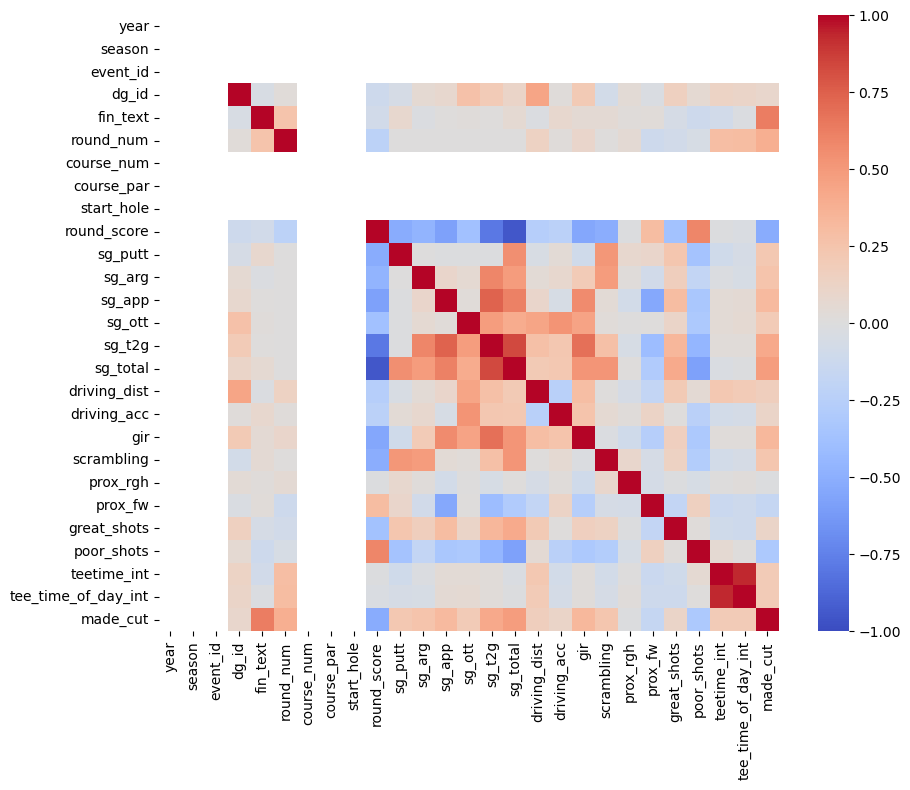

In [217]:
plt.figure(figsize=(10,8))
sns.heatmap(round(corr_coef,2), vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm')
plt.show()

In [218]:
masters2021.columns

Index(['year', 'season', 'event_id', 'dg_id', 'fin_text', 'round_num',
       'course_num', 'course_par', 'start_hole', 'round_score', 'sg_putt',
       'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'driving_dist',
       'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw',
       'great_shots', 'poor_shots', 'teetime_int', 'tee_time_of_day_int',
       'made_cut'],
      dtype='object')

In [219]:
X = masters2021[masters2021.columns[:-1]]
y = masters2021['round_score']

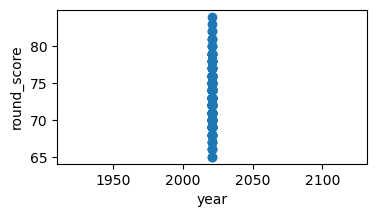

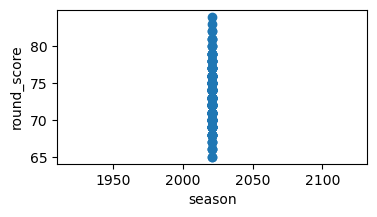

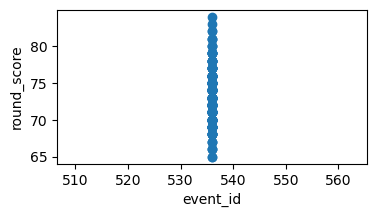

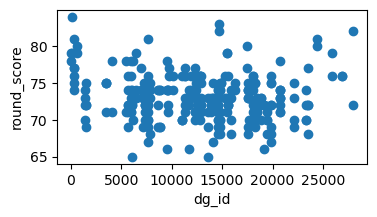

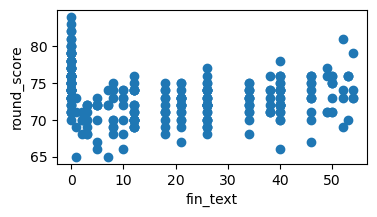

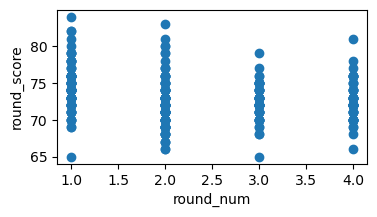

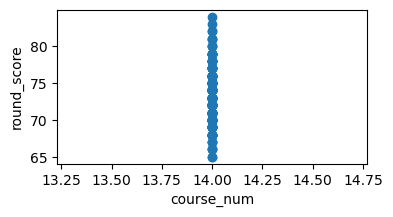

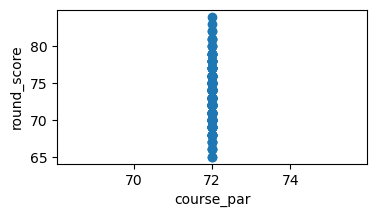

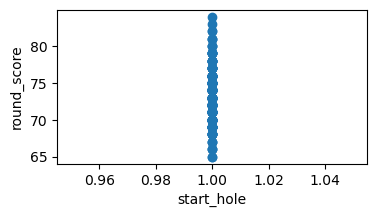

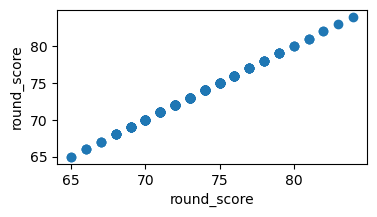

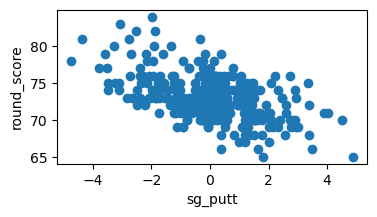

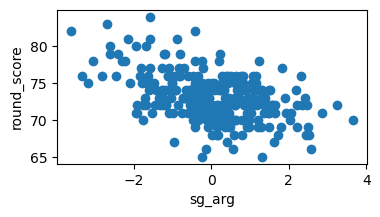

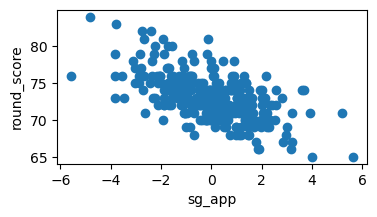

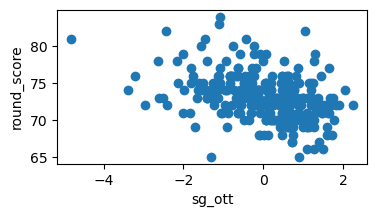

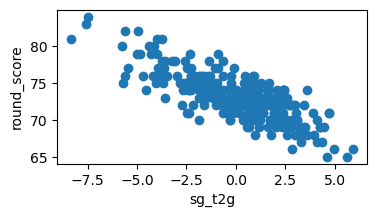

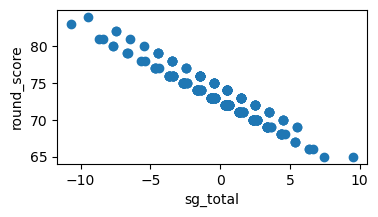

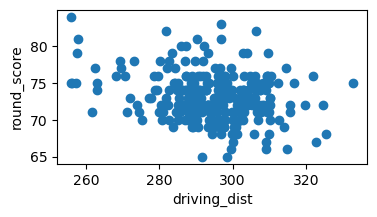

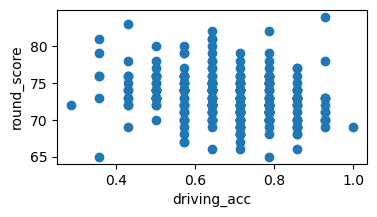

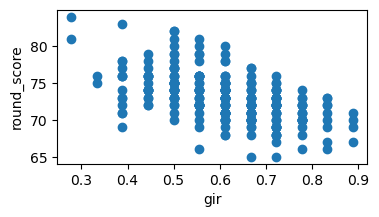

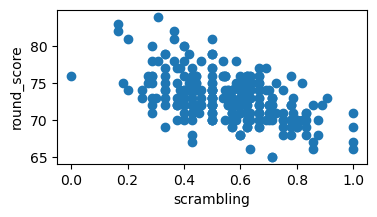

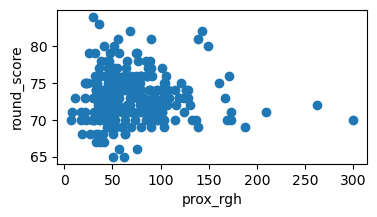

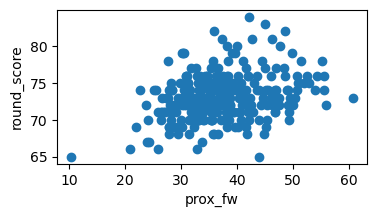

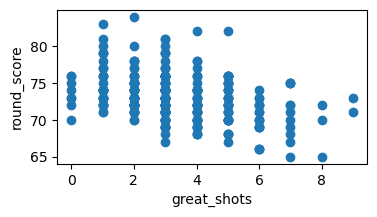

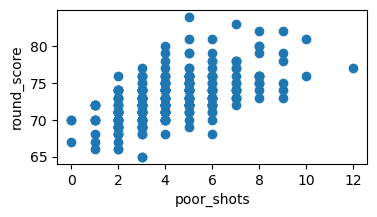

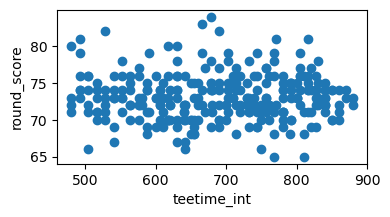

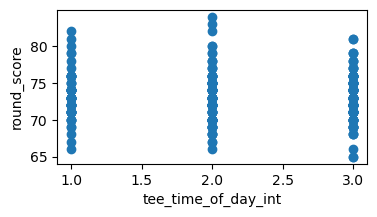

In [221]:
for col in X.columns:
    plt.figure(figsize=(4,2))
    plt.scatter(X[col],y)
    plt.ylabel('round_score')
    plt.xlabel(col)
    plt.show()

In [222]:
X_withconstant = sm.add_constant(X)
rs = sm.OLS(y, X_withconstant)
rs_results = rs.fit()
rs_results.summary()

MissingDataError: exog contains inf or nans